In [6]:
# pandasからSeries, DataFrameの読み込み
import pandas as pd
from pandas import Series, DataFrame
# ライブラリのimport
import numpy as np
import pandas as pd
# 表示桁数の指定
%precision 3
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
# グラフをjupyter notebook内に表示
%matplotlib inline

# ライブラリのimport
import scipy as sp
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [7]:
beer = pd.read_csv('5-1-1-beer.csv')

In [8]:
beer.head()

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8


/Users/Takanori/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/Takanori/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


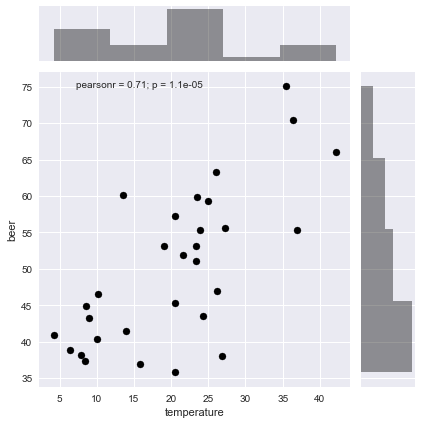

In [9]:
sns.jointplot(x="temperature", y="beer", data=beer, color="black")

## 今回構築するモデル

「気温がモデルに入るかどうか」を判断する<br>

In [11]:
# 予測モデルの構築
lm_model = smf.ols(formula = "beer ~ temperature", data = beer).fit()

In [12]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Sat, 23 Jun 2018   Prob (F-statistic):           1.11e-05
Time:                        10:39:15   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p値をみると0となっている。<br>
気温にかかる係数は有意に０と異なることがわかる<brs>

### AICによるモデル選択

In [13]:
# nullモデルの構築
null_model = smf.ols("beer ~ 1", data=beer).fit()

In [14]:
null_model.aic

227.942

In [15]:
lm_model.aic

208.909

In [16]:
# 推定されたモデルの対数尤度を取得
lm_model.llf

-102.455

In [17]:
lm_model.df_model

1.000

In [19]:
-2 * (lm_model.llf - (lm_model.df_model + 1))

208.909